We will take a look at the the data distributions of the master data file to ensure its quality and remove anything that doesn't pass the inclusion criterions

In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
master_file = os.path.join('/well/doherty/projects/raine/gen1_26/gt3x/wrist/sleepOct20', 'master.csv.gz')
clean_master_file = os.path.join('/well/doherty/projects/raine/gen1_26/gt3x/wrist/sleepOct20', 'clean_master.csv.gz')

In [5]:
main_df = pd.read_csv(master_file, index_col=False)
main_df = main_df.loc[:, ~main_df.columns.str.contains('^Unnamed')]
main_df = main_df.loc[:, ~main_df.columns.str.contains('^idx')]

In [20]:
len(main_df)

845535

In [10]:
main_df.head()

,time,sleep_stage,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,...,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples,pid
0,2016-09-14 22:05:48,0,0.002441,0.003154,0.530467,-0.158635,-0.834665,0.069175,0.073022,0.043869,...,0.000026,0.000016,0.000035,1.0,900.0,0.0,0.0,0.0,901.0,309851
1,2016-09-14 22:06:18,0,0.011548,0.017493,0.716109,-0.166347,-0.617661,0.953613,0.484146,0.649047,...,0.000529,0.000611,0.000705,1.0,900.0,0.0,0.0,0.0,902.0,309851
2,2016-09-14 22:06:48,0,0.009615,0.012009,0.863934,-0.099551,-0.499668,0.562286,0.454137,1.092712,...,0.000710,0.000678,0.000527,1.0,900.0,0.0,0.0,0.0,902.0,309851
3,2016-09-14 22:07:18,0,0.006272,0.006386,0.807006,-0.092272,-0.593144,0.057316,0.109033,0.087737,...,0.000045,0.000032,0.000048,1.0,900.0,0.0,0.0,0.0,902.0,309851
4,2016-09-14 22:07:48,0,0.008497,0.011191,0.813446,-0.067297,-0.584071,0.515841,0.546164,0.403785,...,0.000144,0.000014,0.000049,1.0,900.0,0.0,0.0,0.0,902.0,309851


In [12]:
# number of subjects 
pid_counts = main_df['pid'].value_counts()

In [15]:
pid_counts

899589    1099
609511    1096
915985    1093
727420    1082
592918    1072
          ... 
963600     601
680971     567
551292     397
257243     395
177457      97
Name: pid, Length: 942, dtype: int64

Text(0, 0.5, 'Number of subjects')

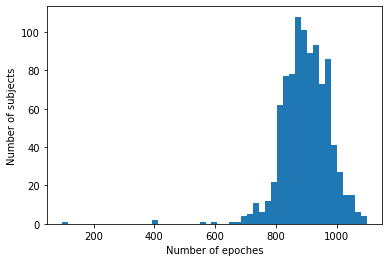

In [18]:
plt.hist(x=pid_counts, bins='auto')
plt.xlabel('Number of epoches')
plt.ylabel('Number of subjects')

In [19]:
main_df.isna().sum()

time                     0
sleep_stage              0
enmoTrunc            30378
enmoAbs              30378
xMean                30378
                     ...  
dataErrors           30378
clipsBeforeCalibr    30378
clipsAfterCalibr     30378
rawSamples           30378
pid                      0
Length: 122, dtype: int64

In [23]:
na_df = main_df[main_df.isnull().any(axis=1)]

In [28]:
len(na_df['pid'].value_counts())

39

In [29]:
na_df['pid'].value_counts()

522554    1018
260090     996
827199     966
929902     957
301790     947
543967     933
479326     927
142644     926
235990     912
562380     908
486215     889
995478     887
427831     884
891469     877
727965     873
724246     868
886832     864
172453     861
281167     822
103103     796
212078     789
531980     787
371890     769
843822     768
446966     766
697324     757
558132     750
455217     747
336637     745
120226     744
784971     736
605324     702
687006     690
942099     659
692409     651
528922     626
154201     559
373066     530
454217     423
Name: pid, dtype: int64

In [79]:
# Remove NA and inf
main_df = main_df.replace([np.inf, -np.inf], np.nan)

In [80]:
main_df = main_df[~main_df.isnull().any(axis=1)]

# This threshold needs to be discussed 

In [85]:
# use 200 as a threshold 
pid_counts = main_df['pid'].value_counts()

In [86]:
pid_counts

899589    1099
609511    1096
915985    1093
727420    1082
592918    1072
          ... 
336637      91
103103      76
301790      46
724246      43
558132       7
Name: pid, Length: 925, dtype: int64

Text(0, 0.5, 'Number of subjects')

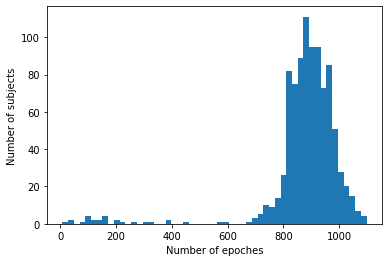

In [87]:
plt.hist(x=pid_counts, bins='auto')
plt.xlabel('Number of epoches')
plt.ylabel('Number of subjects')

In [88]:
# load quality df
quality_df = pd.read_csv('/well/doherty/projects/raine/gen1_26/gt3x/wrist/sleepOct20/quality.csv')

In [89]:
def xName2yName(x_name):
    full_file_name = x_name.split('/')[-1]
    full_file_name = full_file_name[:-13]
    subject_id = full_file_name.split('_')[0]
    
    return subject_id

In [90]:
quality_df['pid'] = quality_df['file_name'].apply(lambda x: xName2yName(x))
quality_ok_pids = quality_df['pid']
quality_ok_pids = quality_ok_pids.to_list()

In [102]:
quality_ok_pids = list(map(int, quality_ok_pids))

In [95]:
pids2check = main_df['pid'].unique()

In [103]:
pids2keep = []
for my_id in pids2check:
    if my_id in quality_ok_pids:
        pids2keep.append(my_id)

In [104]:
len(pids2keep)

901

In [106]:
main_df['quality+'] = main_df['pid'].apply(lambda x: x in pids2keep) 

In [110]:
main_df = main_df[main_df['quality+'] == True]

In [112]:
main_df=main_df.drop(columns=['quality+'])

In [113]:
main_df

,time,sleep_stage,enmoTrunc,enmoAbs,xMean,yMean,zMean,xRange,yRange,zRange,...,vmfft10,vmfft11,vmfft12,temp,samples,dataErrors,clipsBeforeCalibr,clipsAfterCalibr,rawSamples,pid
0,2016-09-14 22:05:48,0,0.002441,0.003154,0.530467,-0.158635,-0.834665,0.069175,0.073022,0.043869,...,0.000026,0.000016,0.000035,1.0,900.0,0.0,0.0,0.0,901.0,309851
1,2016-09-14 22:06:18,0,0.011548,0.017493,0.716109,-0.166347,-0.617661,0.953613,0.484146,0.649047,...,0.000529,0.000611,0.000705,1.0,900.0,0.0,0.0,0.0,902.0,309851
2,2016-09-14 22:06:48,0,0.009615,0.012009,0.863934,-0.099551,-0.499668,0.562286,0.454137,1.092712,...,0.000710,0.000678,0.000527,1.0,900.0,0.0,0.0,0.0,902.0,309851
3,2016-09-14 22:07:18,0,0.006272,0.006386,0.807006,-0.092272,-0.593144,0.057316,0.109033,0.087737,...,0.000045,0.000032,0.000048,1.0,900.0,0.0,0.0,0.0,902.0,309851
4,2016-09-14 22:07:48,0,0.008497,0.011191,0.813446,-0.067297,-0.584071,0.515841,0.546164,0.403785,...,0.000144,0.000014,0.000049,1.0,900.0,0.0,0.0,0.0,902.0,309851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844604,2016-06-10 05:14:48,0,0.000263,0.003205,0.562917,-0.460846,-0.682129,0.028922,0.041041,0.046963,...,0.000004,0.000015,0.000014,1.0,900.0,0.0,0.0,0.0,902.0,483395
844605,2016-06-10 05:15:18,0,0.000285,0.003111,0.562268,-0.462320,-0.681752,0.078787,0.044044,0.060952,...,0.000005,0.000002,0.000002,1.0,900.0,0.0,0.0,0.0,902.0,483395
844606,2016-06-10 05:15:48,0,0.000384,0.003095,0.556333,-0.441250,-0.700709,0.076793,0.059060,0.061951,...,0.000004,0.000006,0.000002,1.0,900.0,0.0,0.0,0.0,902.0,483395
844607,2016-06-10 05:16:18,0,0.000260,0.003010,0.556249,-0.436737,-0.703363,0.031914,0.047048,0.049960,...,0.000002,0.000009,0.000009,1.0,900.0,0.0,0.0,0.0,902.0,483395


<AxesSubplot:>

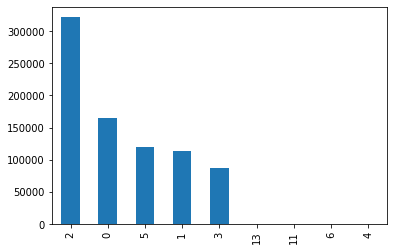

In [114]:
main_df['sleep_stage'].value_counts().plot(kind='bar')


In [116]:
len(main_df)

807835

# Need to remove the extra stages

In [8]:
# convert the numbers into the actual text 
sleep_stage = {
    0: 'awake',
    1: 'N1',
    2: 'N2',
    3: 'N3',
    5: 'REM'
}
valid_stages = [0, 1, 2, 3, 5]

In [4]:
main_df = pd.read_csv(clean_master_file)

In [9]:

main_df['ok_stage'] = main_df['sleep_stage'].apply(lambda x: x in valid_stages) 

In [10]:
main_df = main_df[main_df['ok_stage']]

In [16]:
value_counts = main_df['sleep_stage'].value_counts()
value_counts.index = list(map(sleep_stage.get, value_counts.index))

In [24]:
value_counts

N2       321739
awake    165521
REM      120058
N1       113128
N3        87229
Name: sleep_stage, dtype: int64

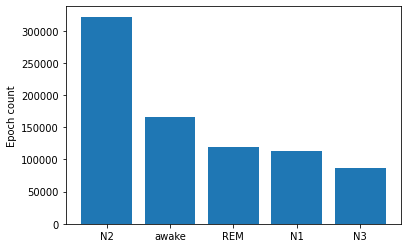

In [28]:
height = value_counts.tolist()
bars = value_counts.index
y_pos = np.arange(len(bars))
 
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.ylabel('Epoch count')
# Show graphic
plt.show()


In [ ]:
main_df.to_csv(clean_master_file, index=False)

## Proper exploratory analysis with meta data

In [2]:
main_df = pd.read_csv(clean_master_file, index_col=False)


In [36]:
meta_data_path = '/well/doherty/users/cxx579/project_data/raine/gen1_26/gen1-sleep-metadata-jun20-newID.csv'
meta_df = pd.read_csv(meta_data_path)

In [7]:
pids_left = main_df['pid'].unique()

In [37]:
meta_df = meta_df.loc[:, ~meta_df.columns.str.contains('^Unnamed')]
meta_df['inlcuded'] = meta_df['Study ID'].apply(lambda x: x in pids_left)
meta_df = meta_df[meta_df['inlcuded'] ]

In [ ]:
# AHI distribution

In [15]:
meta_df

,Study ID,Gender,DOB,Study Date,Age at Study,Study Duration,TST (min),SOL (min),SE (%),WASO (min),...,PLM Index,Total Apnea & Hypopnea (include RERA),TST/60,#resp events/TST (hr)=AHI,Total Apnea & Hypopnea during sleep (exclu RERA),#resp events/TST (hr)=AHI (only during sleep,QC Codes,QC Notes,Notes,inlcuded
0,326169,Female,08/10/1968,24/01/2017,48,465.0,426.0,15.0,91.6,24.0,...,0.0,52.0,7.1,7.3,45.0,6.3,NaN,NaN,NaN,True
1,490916,Male,24/06/1960,24/01/2017,56,466.5,377.0,6.0,80.8,83.5,...,0.6,138.0,6.3,22.0,127.0,20.2,NaN,NaN,NaN,True
3,610865,Male,12/03/1960,14/07/2015,55,512.0,225.0,6.5,43.9,229.0,...,0.0,108.0,3.8,28.8,102.0,27.2,slept less than 4 hours,NaN,slept less than 4 hours,True
5,744162,Male,05/04/1961,07/12/2015,54,438.0,361.0,9.0,82.4,68.0,...,0.0,44.0,6.0,7.3,27.0,4.5,NaN,NaN,NaN,True
6,153826,Female,25/01/1962,26/05/2015,53,488.0,210.5,52.5,43.1,222.0,...,94.9,16.0,3.5,4.6,15.0,4.3,slept less than 4 hours,NaN,slept less than 4 hours,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,203796,Female,16/01/1958,30/05/2016,58,452.5,407.5,7.0,90.1,38.0,...,0.0,70.0,6.8,10.3,70.0,10.3,NaN,NaN,NaN,True
1002,690984,Male,17/09/1964,11/10/2016,52,449.5,382.5,4.0,85.1,63.0,...,0.0,60.0,6.4,9.4,27.0,4.2,NaN,NaN,NaN,True
1003,815095,Female,28/11/1963,05/07/2016,52,445.5,358.0,37.0,80.4,46.0,...,0.0,49.0,6.0,8.2,38.0,6.4,NaN,NaN,NaN,True
1004,152716,Female,19/12/1962,19/05/2016,53,508.0,367.0,46.5,72.2,93.5,...,11.6,29.0,6.1,4.7,22.0,3.6,NaN,NaN,NaN,True


In [41]:
# subject 543693 age should be 56
meta_df['Age at Study'][227] = 56

In [63]:
# remove duplicates two entries 
meta_df = meta_df.drop_duplicates(subset=['Study ID'])

Text(0.5, 1.0, 'Age at Study')

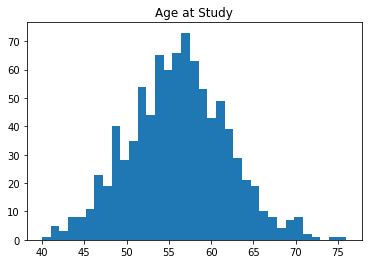

In [64]:
plt.hist(meta_df['Age at Study'], bins=35)
plt.title('Age at Study')

Text(0.5, 1.0, 'AHI distribution: #resp events/TST')

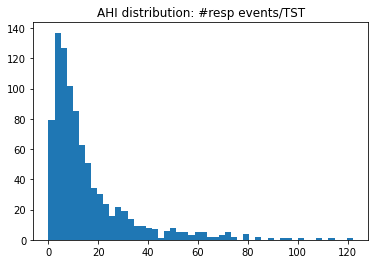

In [65]:
plt.hist(meta_df['#resp events/TST (hr)=AHI'], bins=50)
plt.title('AHI distribution: #resp events/TST')

In [66]:
ahi_levels = pd.IntervalIndex.from_tuples([(0, 5), (5, 15), (15, 30), (30, 200)], closed='left')
meta_df['ahi_levels'] = pd.cut(x=meta_df['#resp events/TST (hr)=AHI'], bins=ahi_levels)


/gpfs3/well/doherty/users/cxx579/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
meta_df['ahi_levels'].value_counts()

[5, 15)      380
[0, 5)       220
[15, 30)     173
[30, 200)    128
Name: ahi_levels, dtype: int64

In [69]:
(173+128)/901

0.3340732519422864

In [71]:
meta_df['Gender'].value_counts()

Female    513
Male      388
Name: Gender, dtype: int64

In [74]:
# write html file in plots dir to visualise all plots
image_dir = '/well/doherty/projects/raine/gen1_26/imgs/'


html = '<html><head><title>Annotation plots</title></head><body>'

viz_fileList = []
for my_pid in pids_left:
    viz_fileList.append(str(my_pid)+'.png')
for viz in viz_fileList:
    html += '<img src="' + viz + '" width=1400 height=700><br>'
html += '</body></html>'
w = open(image_dir + 'selected_viz.html','w')
w.write(html)
w.close()

In [87]:
meta_df[meta_df['Study ID'] == 847637]

,Study ID,Gender,DOB,Study Date,Age at Study,Study Duration,TST (min),SOL (min),SE (%),WASO (min),...,Total Apnea & Hypopnea (include RERA),TST/60,#resp events/TST (hr)=AHI,Total Apnea & Hypopnea during sleep (exclu RERA),#resp events/TST (hr)=AHI (only during sleep,QC Codes,QC Notes,Notes,inlcuded,ahi_levels
336,847637,Male,02/10/1961,26/10/2016,55,460.0,326.5,12.5,71.0,117.0,...,29.0,5.4,5.3,25.0,4.6,NaN,NaN,NaN,True,"[5, 15)"


In [92]:
meta_df[meta_df['QC Codes'] == 'Did not sleep']

,Study ID,Gender,DOB,Study Date,Age at Study,Study Duration,TST (min),SOL (min),SE (%),WASO (min),...,Total Apnea & Hypopnea (include RERA),TST/60,#resp events/TST (hr)=AHI,Total Apnea & Hypopnea during sleep (exclu RERA),#resp events/TST (hr)=AHI (only during sleep,QC Codes,QC Notes,Notes,inlcuded,ahi_levels
454,257243,Male,04/10/1962,18/01/2017,54,203.5,3.5,92.5,1.7,107.5,...,0.0,0.1,0.0,0.0,0.0,Did not sleep,Study terminated at 02h17,"real data - didn't sleep, slept less than 4 ho...",True,"[0, 5)"
646,568641,Female,26/08/1956,19/08/2015,58,453.5,37.5,154.5,8.3,250.0,...,0.0,0.6,0.0,0.0,0.0,Did not sleep,NaN,"real data - didn't sleep, slept less than 4 ho...",True,"[0, 5)"
845,177457,Male,19/12/1962,25/05/2017,54,50.0,5.0,28.5,10.0,15.0,...,0.0,0.1,0.0,0.0,0.0,Did not sleep,Study terminated at 00h21,real data - Lights out 23h35. Sleep 00h03-00h0...,True,"[0, 5)"


In [94]:
257243 in pids_left

True

# Remove the ones that are bad after visu inspection

In [95]:
pids2remove = [558132, 177457, 546753, 847637, 197821, 257243]

In [98]:
main_df['include'] = main_df['pid'].apply(lambda x: x not in pids2remove)

In [103]:
main_df = main_df[main_df['include']]
main_df=main_df.drop(columns=['ok_stage', 'include'])

In [ ]:
main_df.to_csv(clean_master_file, index=False)